# A teasing teaser

Always wanted to do ML something but only found online **fried air** and/or **useless and overpriced tips**?

<img src="../fig/ml_everywhere.jpg" width="400"> <img src="../fig/sas_ml.jpg" width="400">

# We are offering exacly the same!

After all, if you are here, it means that you probably already have the right background to understand these topic, you may just need some tools to do it.

### But
* In $\texttt{R}$
    * Is for *free*
    * You know it!
    * There is a ton of [online documentation](https://stackoverflow.com/questions/tagged/r+machine-learning?sort=votes&pageSize=15) (just in case)
* We are cool
* And so are these **notebooks**

## And, most importantly...

## YOU CAN REPRODUCE IT  BY YOURSELF!!!

### YES, you don't even need a laptop (literally, you can do everything on your smartphone!)

<img src="../fig/inception.jpeg" width="400">

Ever wondered what how do different ML models behave against different taks?

Then **run** the $\texttt{R}$ scripts here below!

Loading required package: tidyverse
── Attaching packages ─────────────────────────────────────── tidyverse 1.2.1 ──
✔ ggplot2 2.2.1     ✔ purrr   0.2.4
✔ tibble  1.4.2     ✔ dplyr   0.7.4
✔ tidyr   0.8.0     ✔ stringr 1.3.0
✔ readr   1.1.1     ✔ forcats 0.3.0
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
Loading required package: caret
Loading required package: lattice

Attaching package: ‘caret’

The following object is masked from ‘package:purrr’:

    lift

Loading required package: keras
Loading required package: mlbench
Loading required package: ggthemes
Loading required package: assertthat

Attaching package: ‘assertthat’

The following object is masked from ‘package:tibble’:

    has_name

Loading required package: kernlab

Attaching package: ‘kernlab’

The following object is masked from ‘package:purrr’:

    cross

The following object is masked from ‘package:ggplot

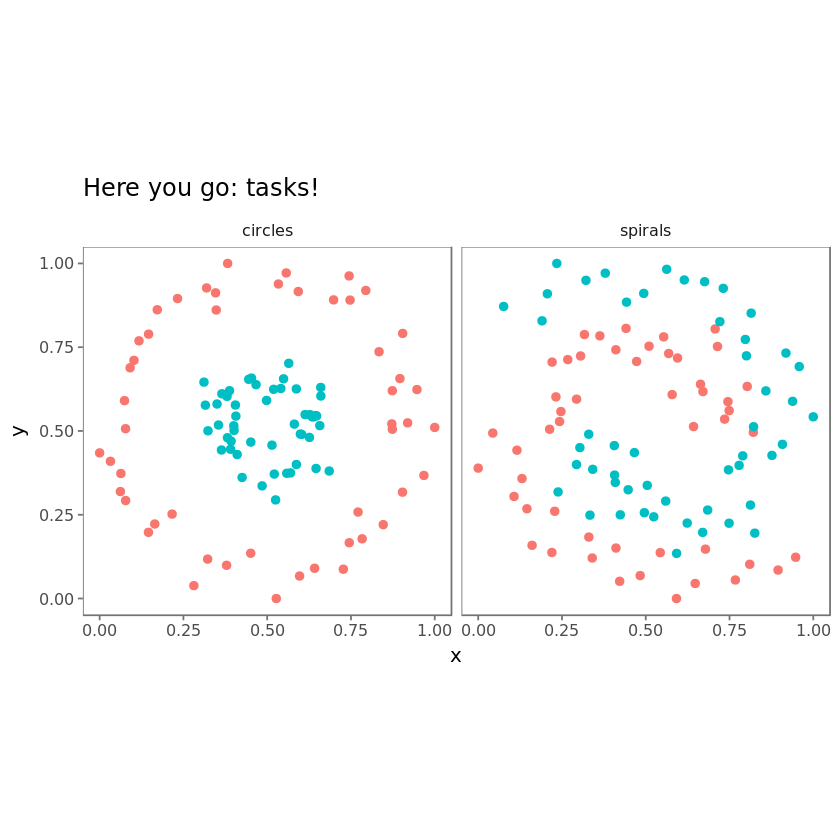

In [2]:
## plot a few datasets

options(warn=-1, error = expression(NULL))
setwd('~')
source('src/lib.R')

get_full_dataset() %>% filter(type %in% c('circles', 'spirals')) %>%
  ggplot(aes(x = x, y = y, color = class)) +
  geom_point(size = 2) + theme_few() +
  ggtitle('Here you go: tasks!') +
  theme(legend.position = "none") +
  facet_wrap(~type) + coord_equal()

We will mostly look at **supervised classification**. The very basic is to classify some observations in a bidimensionnal space. 

note: only 1 unique complexity parameters in default grid. Truncating the grid to 1 .

note: only 1 unique complexity parameters in default grid. Truncating the grid to 1 .

note: only 1 unique complexity parameters in default grid. Truncating the grid to 1 .

note: only 1 unique complexity parameters in default grid. Truncating the grid to 1 .



Joining, by = "tmp"


[1] "randomForest"
[1] "circles"
[1] "prob"
[1] "spirals"
[1] "prob"
[1] "radialSvm"
[1] "circles"
[1] "probabilities"
[1] "spirals"
[1] "probabilities"


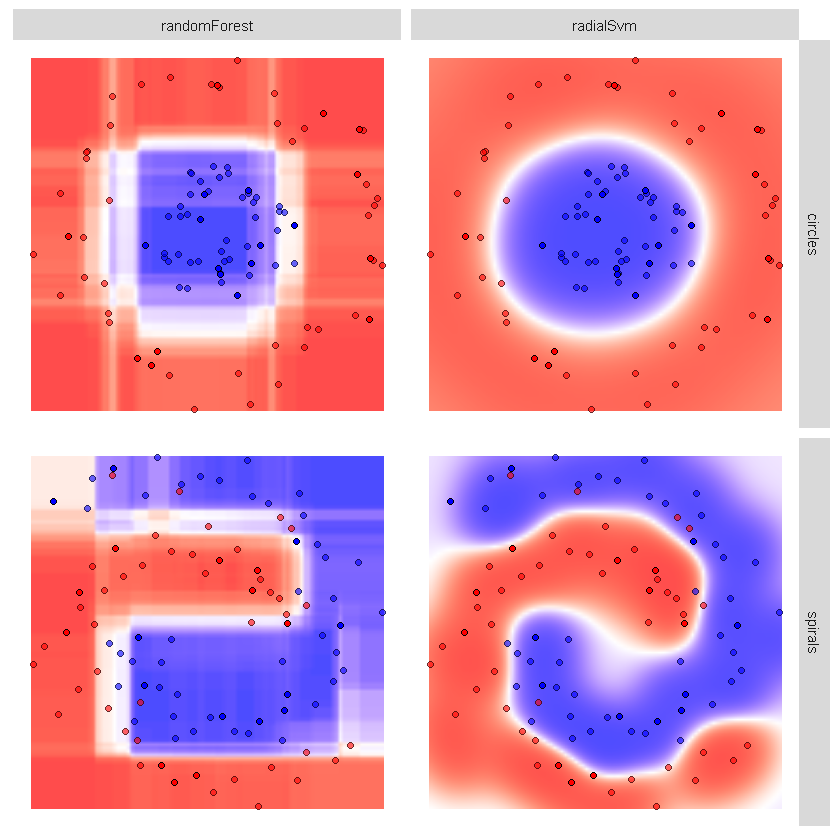

In [6]:
# try this out

methods = list()

methods = list('randomForest' = get_rf_model,
                'radialSvm' = get_radialSvm_model)

# train selected models ####
model = train_models(methods = methods)

# plot trained models ####

data = get_partitioned_df(include_full = F)
data = data[2:3]
plot_models(data, model)

Isn't that cool? **Different models behave differently on the same task!**

Well, you can do *much more*

<img src="../fig/plot_models.png">

Which, btw, it is fairly useless and stop being exciting after a while (because it is actually pointless)

# But...

In the classification framework we can insert very different problems belonging to very different fields!

Let's think a moment about **Credit Risk Management** and *PD* (Probability of Default) definition: isn't that a quantitative measure to split the obligors between the ones that are/aren't likely to default?

The same framework can be simply adapted to an importante problem in a very different field like **character recognition**: if we split the space of all the handwritten single digits (*0,...,9*) in the ones that represent **0**, the ones that represent **1** and so on...we can easy define an automatic system to recognize handwritten digits without any human intervention in the process

 Let's try to prototype a solution to this problem starting from the handwritten digits [MNIST](http://yann.lecun.com/exdb/mnist/]) dataset. The dataset contains a lot of labeled handwritten digits split in train / test dataset: with the first one we'll train our model and with the second we'll asses its performance.

In [3]:
mnist <- dataset_mnist()

x_train <- mnist$train$x
y_train <- mnist$train$y
x_test <- mnist$test$x
y_test <- mnist$test$y

Let's see some digits from the training set

Adding missing grouping variables: `label`
Joining, by = c("label", "index")


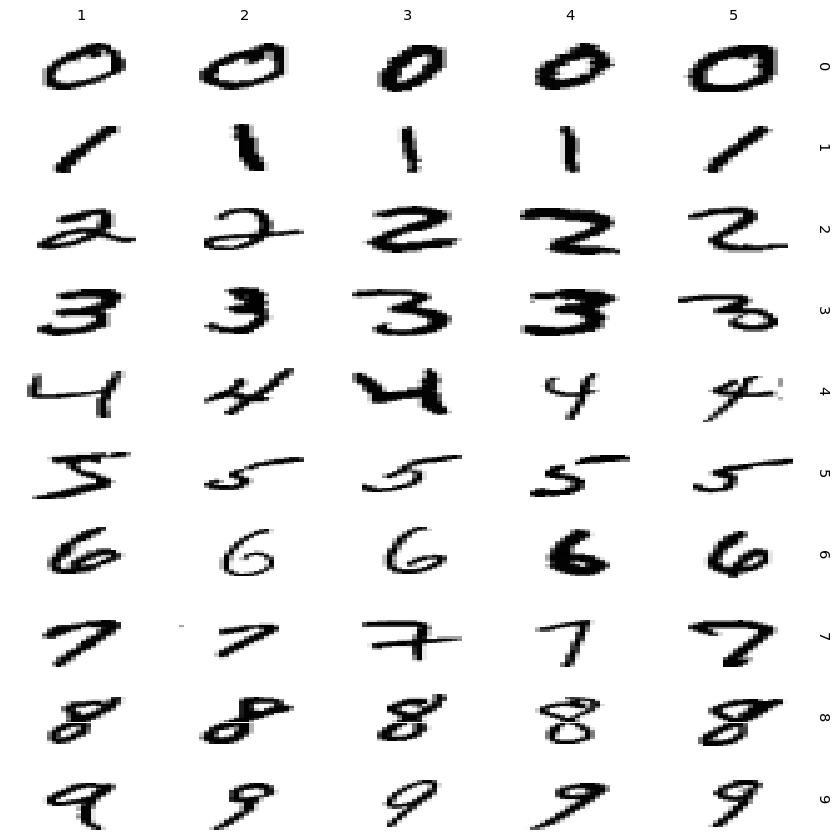

In [4]:
### Plot the data
prepare_pics_df <- function(pic_set, num_pics) {    
  pics_df <- 1:num_pics %>% 
    lapply(function(index) {
      img_mtx <- pic_set[index, ,]
      img_df <- data.frame(img_mtx)
      img_df$y <- 1:nrow(img_df)
      img_long_df <- img_df %>% gather(x, value, -y) %>%
        mutate(x = str_replace_all(x, "X", "") %>% as.integer) %>% 
        mutate(index = index, label = y_train[index]) 
      return(img_long_df)
    }) %>% bind_rows %>%
    mutate(label = factor(label, levels = 0:9))
}

# Get 100 pics from the train & test dataset
train_pics_df <- prepare_pics_df(x_train, 100)
test_pics_df <- prepare_pics_df(x_test, 100) 

# Remove labels from test data: we won't use them
test_pics_df <- test_pics_df %>% select(-label)

### Plot 5 sample for each digit in the training set
train_pics_df %>% group_by(index, label) %>% summarise(tot_pix = n()) %>% 
  group_by(label) %>% mutate(label_index = 1:n()) %>% filter(label_index <= 5) %>% 
  select(index, label_index) %>% inner_join(train_pics_df) %>% 
  ggplot(aes(x = x, y = y, fill = value)) + geom_tile() +
  facet_grid(label~label_index) + theme_void() + 
  scale_fill_gradient(low = "white", high = "black") + 
  guides(fill=FALSE) + scale_y_reverse()

In [5]:
##### Start training

# reshape the data
x_train <- array_reshape(x_train, c(nrow(x_train), 784))
x_test <- array_reshape(x_test, c(nrow(x_test), 784))

# rescale the data
x_train <- x_train / 255
x_test <- x_test / 255

y_train <- to_categorical(y_train, 10)
y_test <- to_categorical(y_test, 10)

# declare the model
model <- keras_model_sequential() 
model %>% 
  layer_dense(units = 256, activation = 'relu', input_shape = c(784), name = 'First_Layer') %>% 
  layer_dropout(rate = 0.4) %>% 
  layer_dense(units = 128, activation = 'relu', name = 'Second_Layer') %>%
  layer_dropout(rate = 0.3) %>%
  layer_dense(units = 10, activation = 'softmax', name = 'Output_Layer')

# istantiate the tensorflow C++ object
# set some training hyperparameters
model %>% compile(
  loss = 'categorical_crossentropy',
  optimizer = optimizer_rmsprop(),
  metrics = c('accuracy')
)

# train the model
history <- model %>% fit(
  x_train, y_train, 
  epochs = 10, batch_size = 128, 
  validation_split = 0.2
)

### Now, will our model be able to reckon the numbers?
Let's take a look to the testing set...

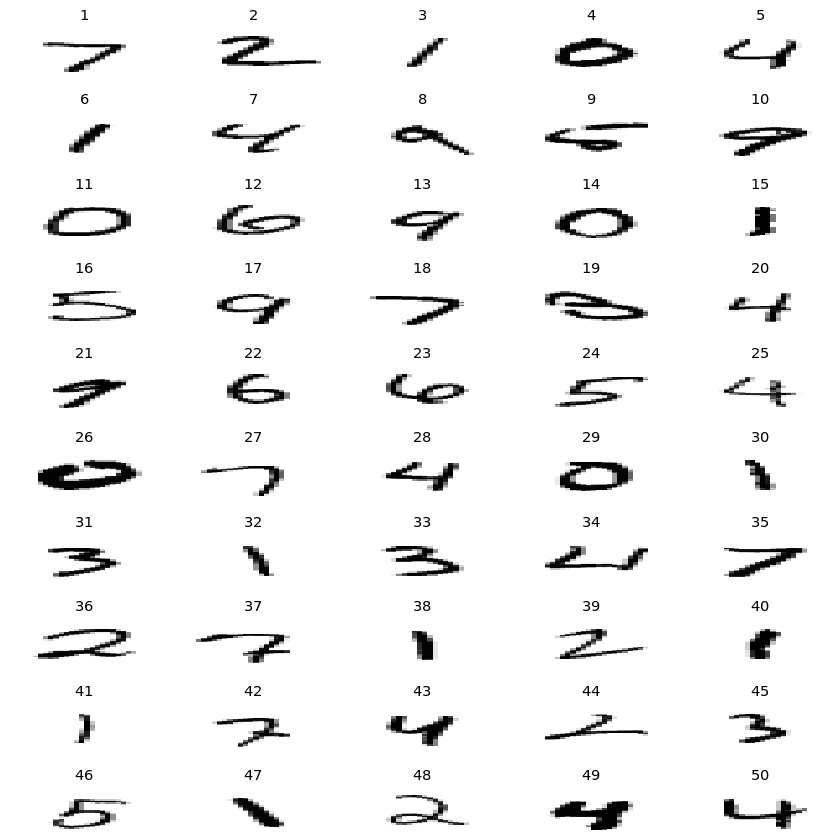

In [6]:
test_pics_df %>% filter(index <= 50) %>% ggplot(aes(x = x, y = y, fill = value)) + geom_tile() +
  facet_wrap(~index, ncol = 5) + theme_void() + 
  scale_fill_gradient(low = "white", high = "black") + 
  guides(fill=FALSE) + scale_y_reverse()

### Hey, A.I., where are my 2s?

Joining, by = "index"


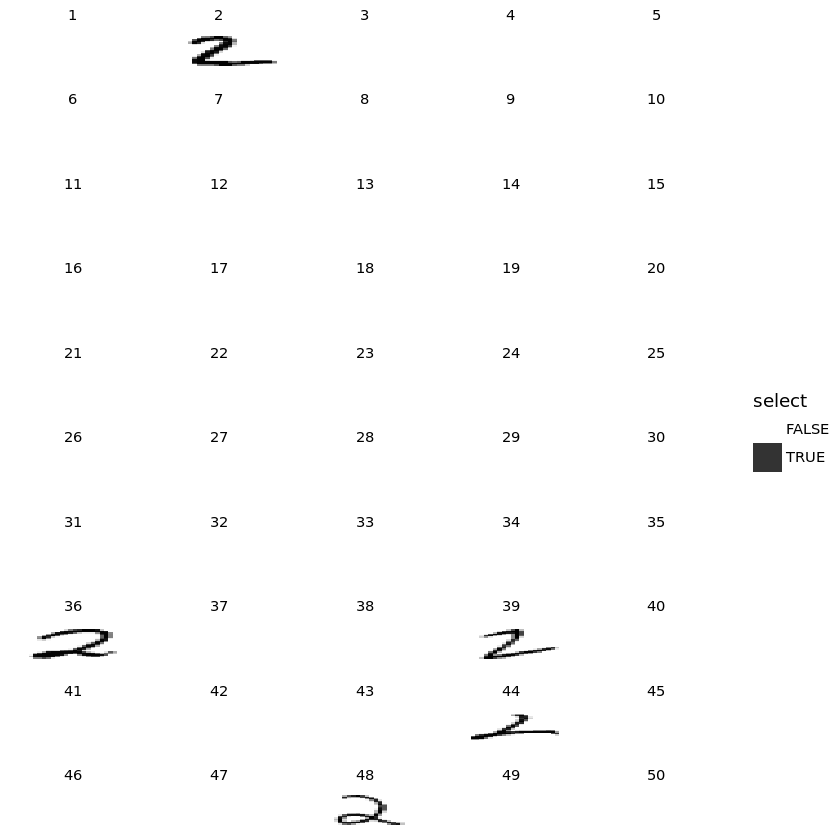

In [7]:
# Prediction on test dataset
prediction_df <- data_frame(
  index = test_pics_df$index %>% unique
) %>% mutate(
  prediction = sapply(index, function(i) {
    model %>% predict_classes(x_test[i,] %>% array_reshape(c(1, 784)))
  })
)

### OK A.I. where are the 2s?
test_pics_df %>% filter(index <= 50) %>% left_join(prediction_df) %>% 
  mutate(select = prediction == 2) %>% 
  ggplot(aes(x = x, y = y, fill = value, alpha = select)) + geom_tile() +
  facet_wrap(~index, ncol = 5) + theme_void() + 
  scale_fill_gradient(low = "white", high = "black") + 
  guides(fill=FALSE) + scale_y_reverse() + scale_alpha_discrete(range = c(0,1))

### Gotcha! But where are my 9s?

Joining, by = "index"


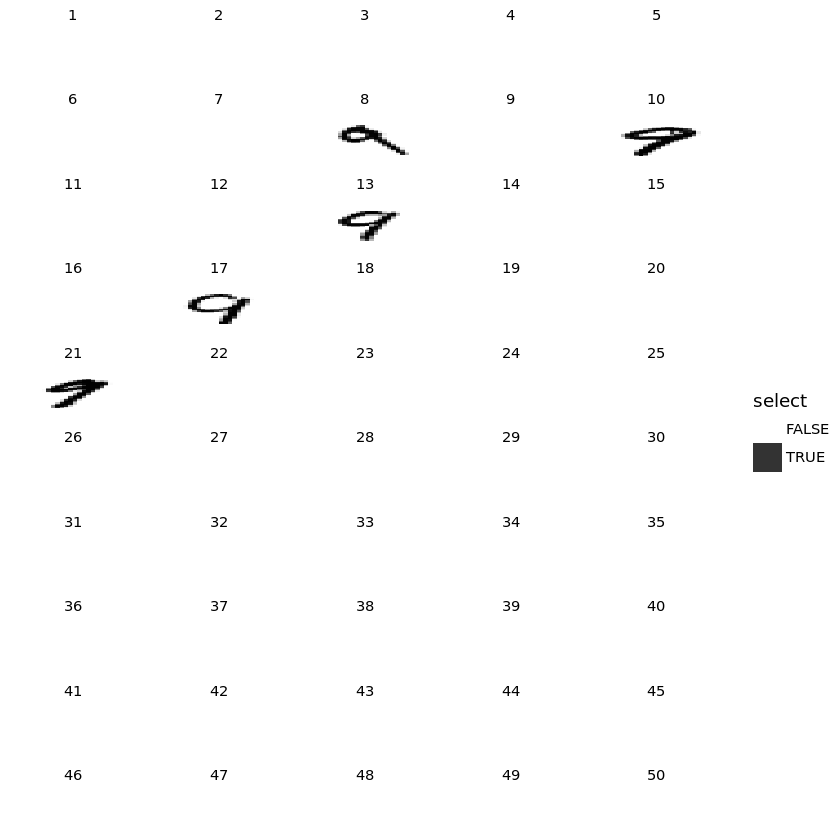

In [8]:
test_pics_df %>% filter(index <= 50) %>% left_join(prediction_df) %>% 
  mutate(select = prediction == 9) %>% 
  ggplot(aes(x = x, y = y, fill = value, alpha = select)) + geom_tile() +
  facet_wrap(~index, ncol = 5) + theme_void() + 
  scale_fill_gradient(low = "white", high = "black") + 
  guides(fill=FALSE) + scale_y_reverse() + scale_alpha_discrete(range = c(0,1))

### Yeah! Great!

Want to see more of this?
## Stay tuned!